# MSINTERFACE Data Science Internship Task 3
## Task : Car Price Prediction
## Name: Mahima Nair

A car price prediction project utilizing machine learning to estimate vehicle prices based on features like brand name, manufacture year, engine cc, fuel type, transmission type, and mileage.

## Notebook Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
cars_data = pd.read_csv('Cardetails.csv')

In [4]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df = cars_data.drop(columns=['torque'])

In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
df.shape

(8128, 12)

## Preprocessing

#### Null Check

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(7907, 12)

In [12]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

#### Duplicate Check

In [13]:
df.duplicated().sum()

1189

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(6718, 12)

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


## Data Analysis

In [18]:
for col in df.columns:
    print("Unique values of "+col)
    print(df[col].unique())
    print("---------------------\n")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
---------------------

Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
---------------------

Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000 

In [19]:
df.describe()

,year,selling_price,km_driven,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,5.434653
std,3.900648,5.235398e+05,5.869980e+04,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [20]:
import matplotlib.pyplot as plt

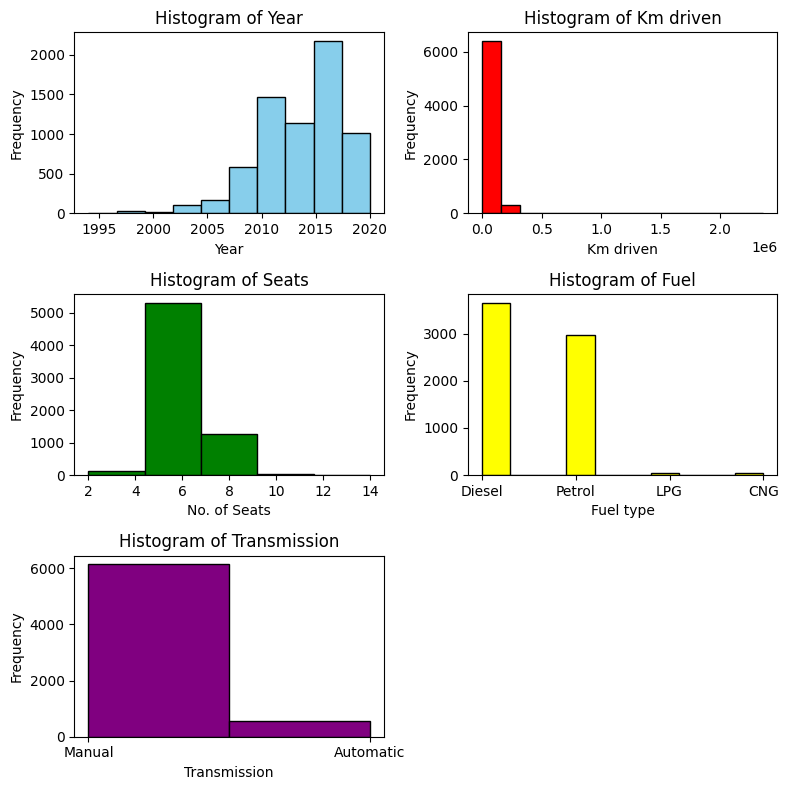

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
# Plot in the first subplot
axs[0, 0].hist(df['year'], bins=10, edgecolor='black',color='skyblue')
axs[0, 0].set_title('Histogram of Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Frequency')

# Plot in the second subplot
axs[0, 1].hist(df['km_driven'], bins=15, edgecolor='black',color='red')
axs[0, 1].set_title('Histogram of Km driven')
axs[0, 1].set_xlabel('Km driven')
axs[0, 1].set_ylabel('Frequency')

# Plot in the third subplot
axs[1, 0].hist(df['seats'], bins=5, edgecolor='black',color='green')
axs[1, 0].set_title('Histogram of Seats')
axs[1, 0].set_xlabel('No. of Seats')
axs[1, 0].set_ylabel('Frequency')

# Hide the fourth subplot
axs[1, 1].hist(df['fuel'], bins=10, edgecolor='black',color='yellow')
axs[1, 1].set_title('Histogram of Fuel')
axs[1, 1].set_xlabel('Fuel type')
axs[1, 1].set_ylabel('Frequency')

axs[2, 0].hist(df['transmission'], bins=2, edgecolor='black',color='purple')
axs[2, 0].set_title('Histogram of Transmission')
axs[2, 0].set_xlabel('Transmission')
axs[2, 0].set_ylabel('Frequency')

fig.delaxes(axs[2, 1])




plt.tight_layout()
plt.show()



In [22]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')
    

In [23]:
df['name'] = df['name'].apply(get_brand_name)

In [24]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [25]:
def change_type(val):
    val = val.split(' ')[0]
    val = val.strip()
    if val == '':
        val = 0
    return float(val)
    

In [26]:
df['mileage'] = df['mileage'].apply(change_type)

In [27]:
df['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 , 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  , 25.5 ,
       26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 , 14.  ,
       18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21,
       15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 ,
       14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01,
       22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96,
       18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56,
       22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44,
       13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 26.6 ,
       17.6 , 28.4 ,

In [28]:
df['engine'] = df['engine'].apply(change_type)

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,5.0


In [30]:
df['max_power'].dtype

dtype('O')

In [31]:
df['max_power'].describe()

count       6718
unique       321
top       74 bhp
freq         324
Name: max_power, dtype: object

In [32]:
df['max_power'].isnull().sum()

0

In [33]:
df['max_power'] = df['max_power'].apply(change_type)

In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.3+ KB


In [36]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [38]:
df2 = df.copy()

In [39]:
df2.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [40]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [41]:
df2['transmission'] = df['transmission'].replace(['Manual', 'Automatic'],[1,2])

In [42]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,1,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,1,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,1,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,1,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,1,First Owner,16.10,1298.0,88.20,5.0


In [43]:
df2['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [44]:
df2['seller_type'] = df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3])

In [45]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,1,1,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,1,1,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,1,1,First Owner,16.10,1298.0,88.20,5.0


In [46]:
df2['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [47]:
df2['fuel'] = df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4])

In [48]:
df2['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [49]:
df2['name'] = df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [51]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0


In [52]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [53]:
df2['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [54]:
df2['owner'] = df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],[1,2,3,4,5])

In [55]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [56]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [57]:
df2.reset_index(inplace=True)

In [58]:
df2

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [59]:
df2.drop(columns='index', inplace=True)

In [60]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 629.9 KB


In [62]:
input_features = df2.drop(columns=['selling_price'])

In [63]:
output_data = df2['selling_price']

In [64]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## Feature Selection

#### Selecting the best score features by using SelectKBest feature selection method

In [67]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest,f_regression,f_classif, SelectPercentile,VarianceThreshold
from sklearn.feature_selection import chi2

k_best_selector = SelectKBest(score_func=f_regression, k=5)  #k=number of features

# Fit the selector to the data and transform the features
X_selected = k_best_selector.fit_transform(input_features, output_data)

# Get the indices of the selected features
selected_indices = k_best_selector.get_support(indices=True)
per_table = pd.DataFrame({'Fetures':list(input_features.columns),'Scores':k_best_selector.scores_})
per_table = per_table.sort_values(by='Scores',ascending=False)

# Print the selected features
selected_features = input_features.columns[selected_indices]
print("Selected features:", selected_features)
per_table

Selected features: Index(['name', 'year', 'transmission', 'engine', 'max_power'], dtype='object')


,Fetures,Scores
9,max_power,6179.539373
5,transmission,1858.369343
8,engine,1638.501076
1,year,1500.726140
0,name,454.264915
4,seller_type,449.453016
3,fuel,431.642352
6,owner,307.782129
2,km_driven,179.427912
10,seats,172.198944


In [69]:
input_features.drop(columns=['seller_type','km_driven'], axis=1, inplace=True)

In [70]:
input_features.head()

,name,year,fuel,transmission,owner,mileage,engine,max_power,seats
0,1,2014,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,2,1,3,17.70,1497.0,78.00,5.0
3,4,2010,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,2,1,1,16.10,1298.0,88.20,5.0


## Model Creation

In [144]:
x_train, x_test, y_train, y_test = train_test_split(input_features, output_data, test_size=0.2)

In [145]:
model = LinearRegression()

In [146]:
model.fit(x_train,y_train)

LinearRegression()

In [147]:
model.score(x_trainv,y_trainv)

0.6108061483777548

In [148]:
y_pred = model.predict(x_test)

In [149]:
y_pred

array([ 449626.5546656 ,  352923.07561798,  424256.76623105, ...,
        589446.05493172, 1418101.72919539, 1301032.39708948])

In [150]:
model.score(x_test,y_test)

0.6390422679106373

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Linear Regression score: {model.score(x_test,y_test)}')
print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')

Mean Squared Error: 77843365577.2878
Linear Regression score: 0.6390422679106373
R2 Score: 0.6390422679106373
RMSE: 279004.2393536123


In [152]:
output_data.describe()

count    6.718000e+03
mean     5.263196e+05
std      5.235398e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.200000e+05
75%      6.500000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [153]:
from sklearn.linear_model import  ElasticNet
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
elastic_net_preds = elastic_net_model.predict(x_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_preds)
print(f'ElasticNet Regression Mean Squared Error: {elastic_net_mse}')
r2 = r2_score(y_test, elastic_net_preds)
print(f'Elastic net score: {elastic_net_model.score(x_test,y_test)}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

ElasticNet Regression Mean Squared Error: 77682015680.9825
Elastic net score: 0.6397904433294582
Mean Squared Error: 77843365577.2878
R2 Score: 0.6397904433294582


In [154]:
input_features.columns

Index(['name', 'year', 'fuel', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

In [155]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6718 non-null   int64  
 1   year          6718 non-null   int64  
 2   fuel          6718 non-null   int64  
 3   transmission  6718 non-null   int64  
 4   owner         6718 non-null   int64  
 5   mileage       6718 non-null   float64
 6   engine        6718 non-null   float64
 7   max_power     6718 non-null   float64
 8   seats         6718 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 472.5 KB


In [156]:
input_data_model = pd.DataFrame(
    [[5,2022,1,1,3,12.99,1000,60,5.0]],columns=['name', 'year', 'fuel', 'transmission','owner', 'mileage', 'engine',
       'max_power', 'seats'])

In [157]:
model.predict(input_data_model)

array([480188.72458525])

### Saving model as pickle file for further use by streamlit

In [158]:
import pickle as pk

In [159]:
pk.dump(model, open('model.pkl', 'wb'))